# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [9]:
!pip install scikit-learn
!pip install palmerpenguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from plotnine import *
pen = load_penguins()

In [10]:
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
pd.get_dummies(pen['species'])

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
339,False,True,False
340,False,True,False
341,False,True,False
342,False,True,False


In [12]:
# Identify categorical columns that need dummification
categorical_cols = ['species', 'island', 'sex']

# Show example of dummifying the 'species' column
pd.get_dummies(pen['species']).head()

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

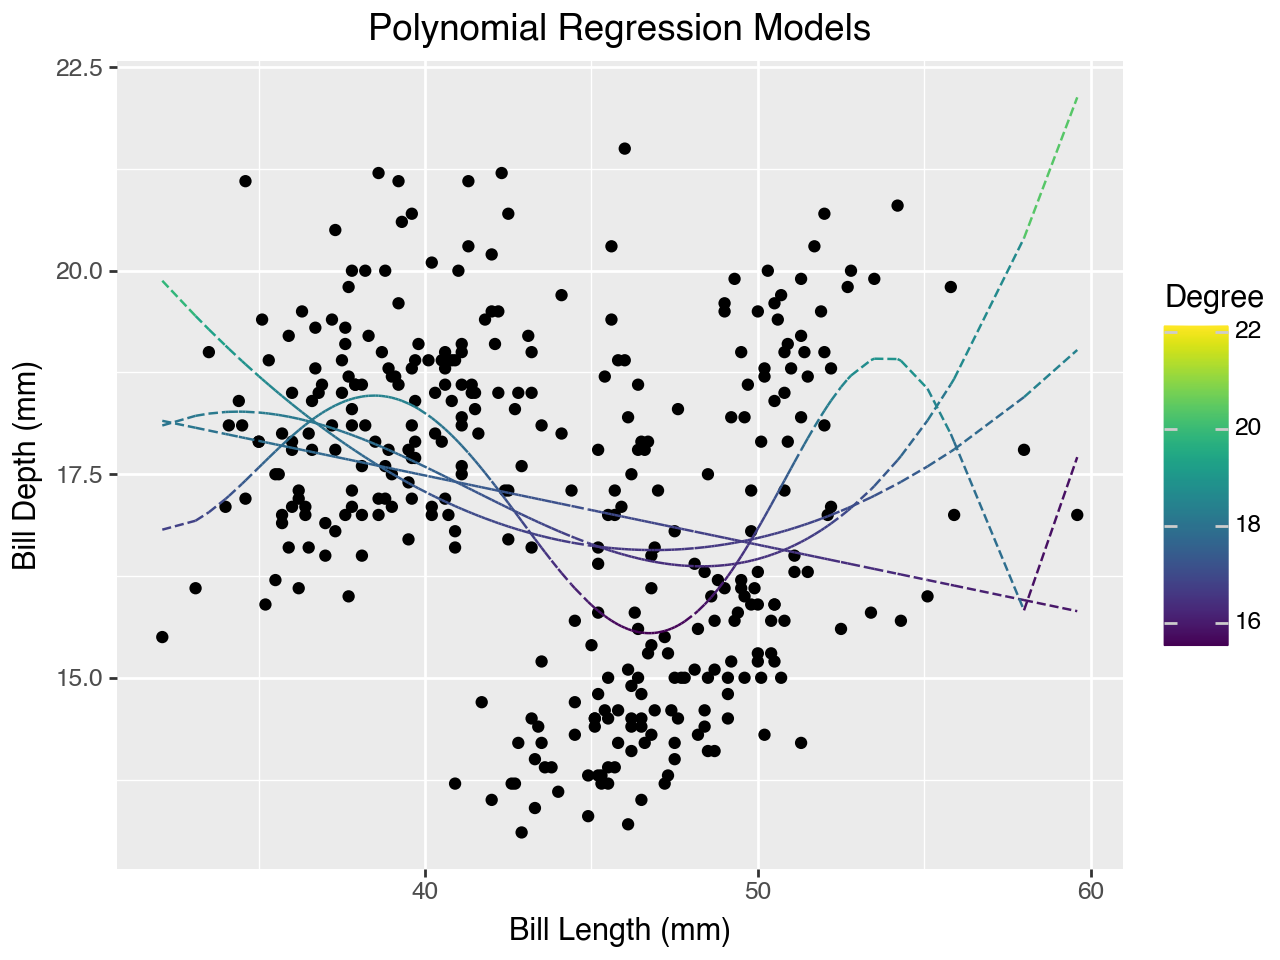

In [13]:
# Load the Palmer Penguins dataset
pen = load_penguins()

# Prepare the data
X = pen[['bill_length_mm']].dropna()
y = pen.loc[X.index, 'bill_depth_mm']

# Create and fit the models
models = {}
degrees = [1, 2, 3, 10]
for degree in degrees:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    model.fit(X, y)
    models[degree] = model

# Make predictions
predictions = {}
for degree, model in models.items():
    predictions[degree] = model.predict(X)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'bill_length_mm': X['bill_length_mm'], 'bill_depth_mm': y})
for degree, preds in predictions.items():
    plot_data[f'degree_{degree}'] = preds


# Plot the fitted models
(
    ggplot(plot_data, aes(x='bill_length_mm', y='bill_depth_mm'))
    + geom_point()
    + geom_line(aes(y='degree_1', color='degree_1'), linetype='dashed')
    + geom_line(aes(y='degree_2', color='degree_2'), linetype='dashed')
    + geom_line(aes(y='degree_3', color='degree_3'), linetype='dashed')
    + geom_line(aes(y='degree_10', color='degree_10'), linetype='dashed')
    + labs(title='Polynomial Regression Models', x='Bill Length (mm)', y='Bill Depth (mm)', color='Degree')
)

In [14]:
# Drop any rows with missing values in the DataFrame `pen`
pen = pen.dropna()

# Set the feature matrix `X` and target variable `y`
# X contains the 'bill_length_mm' column as the feature
# y contains 'bill_depth_mm' as the target variable
X = pen[['bill_length_mm']]
y = pen['bill_depth_mm']

# Import regression models from sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Initialize the models
knn = KNeighborsRegressor()       # k-Nearest Neighbors Regressor
lr = LinearRegression()           # Linear Regression model
dt = DecisionTreeRegressor()      # Decision Tree Regressor

# Import function for splitting data
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train (fit) each model on the training data
lr_fit = lr.fit(X_train, y_train)  # Fit the Linear Regression model
dt_fit = dt.fit(X_train, y_train)  # Fit the Decision Tree model
knn_fit = knn.fit(X_train, y_train)  # Fit the k-NN model

# For Linear Regression, you can inspect the learned coefficient (slope)
lr_fit.coef_

# Make predictions on the test set with each model
y_pred_knn = knn_fit.predict(X_test)  # Predictions from k-NN
y_pred_lr = lr_fit.predict(X_test)    # Predictions from Linear Regression
y_pred_dt = dt_fit.predict(X_test)    # Predictions from Decision Tree

# Import the metric for calculating mean squared error
from sklearn.metrics import mean_squared_error

# Calculate and print mean squared error for each model on the test set
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print the MSE values for each model to compare performance
print("Mean Squared Error (k-NN):", mse_knn)
print("Mean Squared Error (Linear Regression):", mse_lr)
print("Mean Squared Error (Decision Tree):", mse_dt)

# Train the final Linear Regression model on the entire dataset
final_model = lr.fit(X, y)

# Inspect the learned coefficient (slope) of the final model
print("Coefficient of final Linear Regression model:", final_model.coef_)

Mean Squared Error (k-NN): 4.026619047619046
Mean Squared Error (Linear Regression): 3.622782059169419
Mean Squared Error (Decision Tree): 5.715721924603175
Coefficient of final Linear Regression model: [-0.08232675]
Mean Squared Error (k-NN): 4.026619047619046
Mean Squared Error (Linear Regression): 3.622782059169419
Mean Squared Error (Decision Tree): 5.715721924603175
Coefficient of final Linear Regression model: [-0.08232675]


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The lowest degree model is underfitting the data because it its the straightest and does not account for any curve in the data.

The highest degree model is overfitting the data because it is the least generalized and would not adjust well to new data as it is specific to the data we have currently.

The model with a degree between 5-10 would be the "best" fit as it captures enough of the curvature of the data while still being general enough to adjust to new data.